# EDA on Emission By Country

### Importing Libraries

In [256]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as pg
import plotly.express as px


### Data Cleaning

In [257]:
# read data 
df = pd.read_csv(r"Dataset/emission.csv")
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [259]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [260]:
# Checks total duplicate rows
duplicate_check = df.duplicated(keep=False).sum()
print(duplicate_check)

0


In [261]:
df['Year'].unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [262]:
len(df['Country'].unique())

232

In [263]:
## check how many columns contains null values
df.isnull().sum().sort_values()

Country                   0
Year                      0
Total                   200
ISO 3166-1 alpha-3     1632
Coal                  41360
Oil                   41387
Gas                   41486
Flaring               41554
Cement                42290
Per Capita            44130
Other                 61484
dtype: int64

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


### Observation:
    1. Total 63104 rows and 11 columns
    2. Out of 11 columns 9 columns contains null values

In [265]:
# Check uniqueness
df[df['ISO 3166-1 alpha-3'].isna()==True]

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
19312,French Equatorial Africa,NaN,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19313,French Equatorial Africa,NaN,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19314,French Equatorial Africa,NaN,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19315,French Equatorial Africa,NaN,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19316,French Equatorial Africa,NaN,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
47867,Ryukyu Islands,NaN,2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
47868,Ryukyu Islands,NaN,2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
47869,Ryukyu Islands,NaN,2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
47870,Ryukyu Islands,NaN,2020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [266]:
countries = list(df[df['ISO 3166-1 alpha-3'].isna()==True]['Country'].unique())

In [267]:
len(countries)

6

In [268]:
# we drop the six countries simply
df = df[~df['Country'].isin(countries)]
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
len(df['Country'].unique())

226

In [270]:
# we can assume that if a country doesn't have any emissions then that to be zero (all the numerical columns)

In [271]:
df.fillna(0, inplace = True)

In [272]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
 # This is list of wiki_iso_code  is copied from wikipedia https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3 to check wheather all the country of the world are in data or not
wiki_iso_code = ['ABW','AFG','AGO','AIA','ALA','ALB','AND','ARE','ARG','ARM','ASM','ATA','ATF',
'ATG','AUS','AUT','AZE','BDI','BEL','BEN','BES','BFA','BGD','BGR','BHR','BHS',
'BIH','BLM','BLR','BLZ','BMU','BOL','BRA','BRB','BRN','BTN','BVT','BWA','CAF',
'CAN','CCK','CHE','CHL','CHN','CIV','CMR','COD','COG','COK','COL','COM','CPV',
'CRI','CUB','CUW','CXR','CYM','CYP','CZE','DEU','DJI','DMA','DNK','DOM','DZA',
'ECU','EGY','ERI','ESH','ESP','EST','ETH','FIN','FJI','FLK','FRA','FRO','FSM',
'GAB','GBR','GEO','GGY','GHA','GIB','GIN','GLP','GMB','GNB','GNQ','GRC','GRD',
'GRL','GTM','GUF','GUM','GUY','HKG','HMD','HND','HRV','HTI','HUN','IDN','IMN',
'IND','IOT','IRL','IRN','IRQ','ISL','ISR','ITA','JAM','JEY','JOR','JPN','KAZ',
'KEN','KGZ','KHM','KIR','KNA','KOR','KWT','LAO','LBN','LBR','LBY','LCA','LIE',
'LKA','LSO','LTU','LUX','LVA','MAC','MAF','MAR','MCO','MDA','MDG','MDV','MEX',
'MHL','MKD','MLI','MLT','MMR','MNE','MNG','MNP','MOZ','MRT','MSR','MTQ','MUS',
'MWI','MYS','MYT','NAM','NCL','NER','NFK','NGA','NIC','NIU','NLD','NOR','NPL',
'NRU','NZL','OMN','PAK','PAN','PCN','PER','PHL','PLW','PNG','POL','PRI','PRK',
'PRT','PRY','PSE','PYF','QAT','REU','ROU','RUS','RWA','SAU','SDN','SEN','SGP',
'SGS','SHN','SJM','SLB','SLE','SLV','SMR','SOM','SPM','SRB','SSD','STP','SUR',
'SVK','SVN','SWE','SWZ','SXM','SYC','SYR','TCA','TCD','TGO','THA','TJK','TKL',
'TKM','TLS','TON','TTO','TUN','TUR','TUV','TWN','TZA','UGA','UKR','UMI','URY',
'USA','UZB','VAT','VCT','VEN','VGB','VIR','VNM','VUT','WLF','WSM','YEM','ZAF',
'ZMB','ZWE']

In [274]:
len(set(wiki_iso_code))

249

In [275]:
dataset_iso_code = df['ISO 3166-1 alpha-3'].unique()
print(len(dataset_iso_code))

225


In [276]:
remaining_code = [code for code in wiki_iso_code if code not in dataset_iso_code]
print(remaining_code)

['ALA', 'ASM', 'ATF', 'BLM', 'BVT', 'CCK', 'CYM', 'ESH', 'FLK', 'GGY', 'GIB', 'GUM', 'HMD', 'IMN', 'IOT', 'JEY', 'MAF', 'MCO', 'MNP', 'NFK', 'PCN', 'SGS', 'SJM', 'SMR', 'TKL', 'UMI', 'VAT', 'VIR']


In [277]:
len(remaining_code)

28

In [278]:
total_code = set(remaining_code).union(set(dataset_iso_code))

In [279]:
extra_code = [code for code in dataset_iso_code if code not in wiki_iso_code]
print(extra_code)

['PCZ', 'KSV', 'XIT', 'WLD']


In [280]:
df[df['ISO 3166-1 alpha-3'].isin(extra_code)].groupby(['ISO 3166-1 alpha-3','Country']).sum()

,,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
ISO 3166-1 alpha-3,Country,,,,,,,,,
KSV,Kosovo,512856,1.113061e+02,81.700028,26.125623,0.000000,3.480453,0.000000,0.000000,63.469577
PCZ,Panama Canal Zone,512856,1.476226e+01,0.000000,14.711150,0.051106,0.000000,0.000000,0.000000,0.000000
WLD,Global,512856,1.736930e+06,804190.053522,605476.736614,254057.821146,45066.925255,18454.285582,8057.042204,406.597729
XIT,International Transport,512856,4.306267e+04,0.000000,43062.671846,0.000000,0.000000,0.000000,0.000000,0.000000


## Observation
    1. It is Clear that 28 ISO codes are not listed in this dataset.
    2. Out of those 28 ISO 31661-1 alpha-3  KSV, PCZ, WLD, XIT are not comes even ISO 3166-1 alpha 3.
    3. Accoding to ISO 3166-3 PCZ changed to PZPA that is mearged with panama.
    4. Kosovo is a country but no ISO code is assigned to it.
    5.Global and Internation Transport are not countries they are total

In [281]:
## There are some rows for entire world data whoe and international transport lets seperate that out
world_data = df[df['ISO 3166-1 alpha-3']=='WLD']

In [282]:
df = df[df['Country']!='Global']
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.506945,0.0,1230.506945,0.0,0.0,0.0,0.0,0.0
62828,International Transport,XIT,2018,1270.690768,0.0,1270.690768,0.0,0.0,0.0,0.0,0.0
62829,International Transport,XIT,2019,1249.558280,0.0,1249.558280,0.0,0.0,0.0,0.0,0.0
62830,International Transport,XIT,2020,938.508679,0.0,938.508679,0.0,0.0,0.0,0.0,0.0


In [283]:
transport_data = df[df["Country"]=='International Transport']
transport_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62560,International Transport,XIT,1750,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62561,International Transport,XIT,1751,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62562,International Transport,XIT,1752,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62563,International Transport,XIT,1753,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62564,International Transport,XIT,1754,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.506945,0.0,1230.506945,0.0,0.0,0.0,0.0,0.0
62828,International Transport,XIT,2018,1270.690768,0.0,1270.690768,0.0,0.0,0.0,0.0,0.0
62829,International Transport,XIT,2019,1249.558280,0.0,1249.558280,0.0,0.0,0.0,0.0,0.0
62830,International Transport,XIT,2020,938.508679,0.0,938.508679,0.0,0.0,0.0,0.0,0.0


In [284]:
### VIsualisation

In [285]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

KeyError: 'French Equatorial Africa'

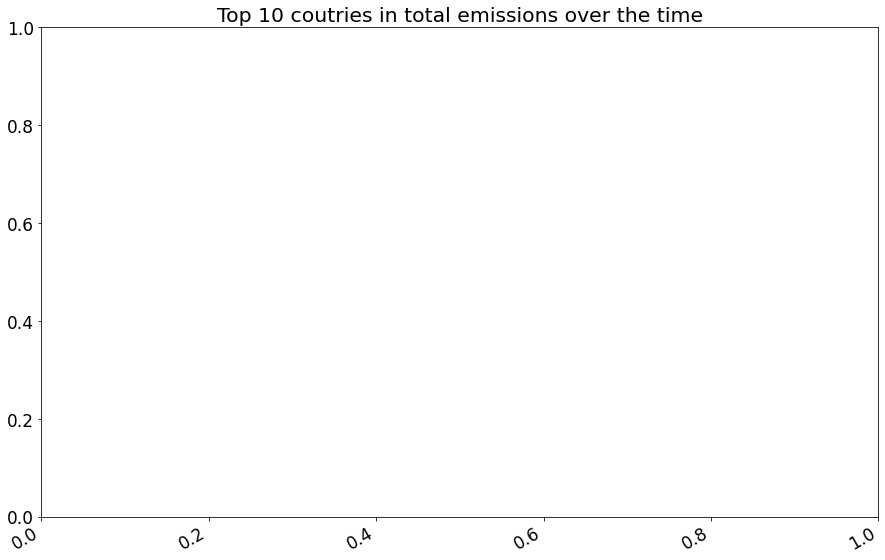

In [286]:
## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Top 10 coutries in total emissions over the time")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:10], y=values[:10], palette ='Set2', edgecolor ='.2')

In [ ]:
plt.figure(figsize = (18,8))
plt.rcParams['font.size'] = 15.0
plt.pie(values[:10], labels = countries[:10], autopct='%1.2f%%')
plt.axis('equal')
plt.title('Top 10 countries based on CO2 emissions over the time')

### Observation:-
    1.Over the time USA is in the top of co2 emission

In [ ]:
#Lets consider India for a small study over the trend of emissions
india_data = df[df['Country']=='India']


In [ ]:
#Lets see the trend of emissions of India over the past 10 years

In [ ]:
india_past_10 = india_data[-10:]

In [ ]:


plt.figure(figsize = (18,5))
# Plot 1
plt.subplot(1,2,1)
sns.lineplot(x = 'Year', y = 'Total', data = india_past_10)
plt.rcParams['font.size'] = 20
plt.xticks(rotation = 30, ha = 'right')
plt.title("Trend of emission in India over last 10 years")

# plot 2
plt.subplot(1,2,2)
sns.barplot(x='Year', y='Total', data = india_past_10)
plt.xticks(rotation = 60, ha = 'right')
plt.title("Trend of emission in India over last 10 years")




In [ ]:
#The dip in 2020 might be due to COVID19 and lockdowns all around but the trend has been clearly increasing all over years

In [ ]:
#Trend of all types of emissions over last 10 years
columns = ['Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other']
plt.figure(figsize = (18,7))
plt.plot('Year', 'Total', data = india_past_10)
plt.plot('Year','Coal',data = india_past_10)
plt.plot('Year','Oil', data =india_past_10 )
plt.plot('Year','Gas', data =india_past_10 )
plt.plot('Year','Cement', data =india_past_10 )
plt.plot('Year','Flaring', data =india_past_10 )
plt.plot('Year','Other', data =india_past_10 )
plt.legend()

## Conclusion
    1. Over the last decade coal and oil are the main reason of emission
        

In [ ]:
# Corralation between the emission
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)


In [ ]:
# Corralation between the emission
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.yticks(rotation = '0')


In [ ]:
# During the last 10 years which emission gained higher amongst all
plt.figure(figsize=(12,5))
world_data_past_10 = world_data[-10:]
values_world = []
for i in columns:
    values_world.append(world_data_past_10.iloc[9][str(i)]-world_data_past_10.iloc[0][i])        
    print(world_data_past_10.iloc[9][i])
    print(world_data_past_10.iloc[0][i])
    print(world_data_past_10.iloc[9][i]-world_data_past_10.iloc[0]['Coal'])

print(values_world)

In [ ]:
# During the last 10 years which emission gained higher amongst all
plt.figure(figsize=(12,5))
world_data_past_10 = world_data[-10:]
values_world = []
for i in columns:
    values_world.append(world_data_past_10.iloc[9][str(i)]-world_data_past_10.iloc[0][i])        
values_india = []
for i in columns:
    values_india.append(india_past_10.iloc[9][i]-india_past_10.iloc[0][i])
plt.subplot(1,2,1)
sns.barplot(x=columns, y=values_world, palette = 'Set2', edgecolor = '0.3')
plt.title('World')
plt.xticks(rotation = '60')
plt.subplot(1,2,2)
sns.barplot(x=columns, y = values_india, palette = 'Set2', edgecolor ='.3')
plt.title('India')
plt.xticks(rotation = '60')

## Conclusion
    In last 10 years :-
    1.Emissions due to gas are majority in world
    2.In India Emissions due to Coal gained the most 

In [ ]:
# Analysis the data of AFG over past 30 years which has been continously affected by war
afg = df[df['ISO 3166-1 alpha-3']=='AFG']
afg_past_30 = afg[-30:]


In [ ]:
cols = ['Total']+columns
plt.figure(figsize = (14,8))
sns.lineplot(x=afg_past_30['Year'], y=afg_past_30['Total'])
for i in columns:
    sns.lineplot(x=afg_past_30['Year'], y=afg_past_30[i])
plt.legend(cols)
plt.rcParams['font.size'] = 20
plt.title('Afghanistan emission trend of past 30 years')
plt.grid()
plt.show()


## Conclusion
    1.The emission have been increased due to formation of more organized trade and goverment in later 2000s
    2.Most of the emission are again from cola

In [ ]:
#top 10 countreis with most average emissions over last 10 years

In [ ]:
plt.figure(figsize = (14,8))
data_past_10 = df[df['Year']>=2011]
avg_emission = data_past_10.groupby('Country').mean().sort_values(by='Total', ascending = False)[:10].reset_index()

sns.scatterplot(x='Total', y='Per Capita', data = avg_emission, hue = 'Country')
plt.legend(loc = ('upper right'),bbox_to_anchor = (1.3, 1),prop={'size': 12})
plt.tight_layout()
plt.grid()

## Conclusion
    Developing countries taking up the lower portion of plot and developed portions the upper

In [ ]:
# Which countries have the highest average emission in each sectors over the past 10 years (top 5)


In [ ]:
for i in columns:
    print('\nSECTOR>>>>', str(i))
    avg_data = data_past_10.groupby('Country').mean().sort_values(by = str(i), ascending = False)[:10].reset_index()
    countries = avg_data['Country'][:5]
    for j in countries:
        print(j)

In [ ]:
# Geography Plots sector wise
avg_data = data_past_10.groupby('Country').mean().reset_index()


In [ ]:
countries = avg_data['Country'].values
ISO = []
for i in countries:
    ISO.append(data_past_10[data_past_10['Country']==str(i)]['ISO 3166-1 alpha-3'].unique()[0])

In [ ]:
cols.append('Per Capita')

In [ ]:
colors = ['magenta','gnbu','purp','turbo','ice','curl','oxy','haline']

In [ ]:
for index,i in enumerate(cols):
    data = dict(type ='choropleth',
               colorscale = str(colors[index]),
               locations = ISO,
               z = avg_data[str(i)])
    if i!='Per Capita':
        layout = dict(title = str(i) + 'Emission By Country',
                      geo = dict(projection = {'type':'robinson'},
                                 showlakes = False)
                     )
    else:
        layout = dict(title = 'Per Capita By Country',
                       geo = dict(projection = {'type':'robinson'},
                                  showlakes = False)
                      )
    x = pg.Figure(data= [data], layout = layout)
    po.iplot(x)